<img src="https://raw.githubusercontent.com/FUlyankin/r_probability/master/end_seminars/sem_5/pEbNtDxzx0Q.jpg" height="500" width="500"> 

# <center> R для тервера и матстата <br>  <br> Мощь средних </center>

In [19]:
library("ggplot2")  # Пакет для красивых графиков 
library("grid")     # Пакет для субплотов

# Отрегулируем размер картинок, которые будут выдаваться в нашей тетрадке
library('repr')
options(repr.plot.width=4, repr.plot.height=2)

In [20]:
library('rio')  # https://www.rdocumentation.org/packages/rio/versions/0.5.16

## Упражнение про Киллера

Киллер - это весёлая лагерная игра. Краткие правила игры:

- Игроки пишут свои имена на карточках и кладут их в шляпу
- Игроки рандомно вытаскивают карточки из шляпы 
- Полученное имя - имя жертвы
- Каждый игрок одновременно и убийца и жертва
- Чтобы убить другого игрока, надо оказаться с ним наедине и застрелить из пальца
- Жертва убитого становится новой жертвой игрока
- Побеждает тот, кто совершит наибольшее число убийств

На экономическом факультете было два раунда игры в киллера. Все убийства регистрировались в гугл-форме. В табличках `killer_time1.csv` и `killer_time2.csv` лежит время в часах, которое проходило между убийствами.

In [57]:
df1 = import('killer_time1.csv', dec = ",", sep='\t')
df2 = import('killer_time2.csv', dec = ",", sep='\t')

x = df1$hours_between_kill
y = df2$hours_between_kill

In [42]:
print(length(x))
print(length(y))

[1] 36
[1] 17


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


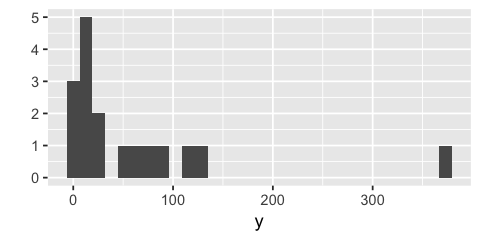

In [46]:
qplot(y)

Будем считать, что время до следующего убийства имеет экспоненциальное распределение. То есть число убийств - простейший поток событий. 

__Задание 1:__ найдите оценку параметра $\lambda$ с помощью метода моментов.

$$E(X) = \frac{1}{\lambda}$$

$$Var(X) = \frac{1}{\lambda^2}$$

In [30]:
lam_x = 1/mean(x)
lam_y = 1/mean(y)

print(lam_x)
print(lam_y)

[1] 0.02584336
[1] 0.01649813


In [31]:
print(1/lam_x)
print(1/lam_y)

[1] 38.69465
[1] 60.61294


In [47]:
print(median(y))
print(median(x))

[1] 19.51119
[1] 24.19629


__Задание 2:__ постройте для неизвестного параметра $\lambda$ доверительный интервал. Возьмите уровень значимости равный $10\%$.

$$
\hat{\lambda} = \frac{1}{\bar x} \sim N \left( \lambda, \frac{1}{\lambda^2 \cdot n} \cdot \lambda^4  \right)
$$

$$
\hat{\lambda} = \frac{1}{\bar x} \sim N \left( \lambda, \frac{1}{\bar x ^2 \cdot n}\right)
$$

$$ g(t) = \frac{1}{t} $$

$$g'(t) = - \frac{1}{t^2} $$

In [45]:
#sample = x
sample = y

alpha = 0.1
z = qnorm(1 - alpha/2)

left = 1/mean(sample) - z*sqrt(1/(mean(sample)^2 * length(sample)))
right = 1/mean(sample) + z*sqrt(1/(mean(sample)^2 * length(sample)))
delta = right - left

print(left)
print(right)
print(delta)

[1] 0.009916437
[1] 0.02307982
[1] 0.01316338


__Задание 3:__ постройте для неизвестного математического ожидания $\frac{1}{\lambda}$ доверительный интервал. Возьмите уровень значимости равный $10\%$.

$$
\hat \mu = \frac{1}{\hat \lambda} = \bar x \sim N \left( \frac{1}{\lambda}, \frac{1}{\lambda^2 \cdot n} \right)
$$

$$
\hat \mu = \frac{1}{\hat \lambda} = \bar x \sim N \left( \frac{1}{\lambda}, \frac{\bar x^2}{n} \right)
$$

$$
\bar x \pm z_{1 - \frac{\alpha}{2}} \cdot \sqrt{\frac{\bar x^2}{n}} 
$$

In [41]:
#sample = x
sample = y

alpha = 0.1
z = qnorm(1 - alpha/2)

left = mean(sample) - z*sqrt(mean(sample)^2/length(sample))
right = mean(sample) + z*sqrt(mean(sample)^2/length(sample))
delta = right - left

print(left)
print(right)
print(delta)

[1] 36.43228
[1] 84.7936
[1] 48.36132


Правда ли, что первая игра была более интенсивной, чем вторая, то есть в течение неё людей убивали быстрее?

__Задание 4:__   Постройте для разницы $\frac{1}{\lambda_2} - \frac{1}{\lambda_1}$ доверительный интервал. Попадает ли в него ноль? Что это означает? 

$$
\frac{1}{\hat \lambda_1} = \bar x \sim N \left( \frac{1}{\lambda_1}, \frac{\bar x^2}{n} \right)
$$

$$
\frac{1}{\hat \lambda_2} = \bar y \sim N \left( \frac{1}{\lambda_2}, \frac{\bar y^2}{m} \right)
$$

$$
\frac{1}{\hat \lambda_2} - \frac{1}{\hat \lambda_1} = \bar y - \bar x \sim N \left(\frac{1}{\lambda_2} - \frac{1}{\lambda_1}, \frac{\bar x^2}{n}  + \frac{\bar y^2}{m}  \right)
$$

$$
(\bar y - \bar x) \pm z_{1- \frac{\alpha}{2}} \cdot \sqrt{\frac{\bar x^2}{n}  + \frac{\bar y^2}{m} }
$$

In [48]:
alpha = 0.1
z = qnorm(1 - alpha/2)

sd = sqrt(mean(x)^2/length(x) + mean(y)^2/length(y))
diff = mean(y) - mean(x)

left = diff - z*sd
right = diff + z*sd
delta = right - left

print(left)
print(right)
print(delta)

[1] -4.486836
[1] 48.32341
[1] 52.81025


__Задание 5:__  Проверьте гипотезу о том, что первая игра оказалась более интенсивной. Чётко сформулируйте все предпосылки, гипотезы и критерий, который вы используйте. 

\begin{equation*}
\begin{aligned}
& H_0 : \frac{1}{\lambda_2} = \frac{1}{\lambda_1} \\
& H_a : \frac{1}{\lambda_2} > \frac{1}{\lambda_1}
\end{aligned}
\end{equation*}

__Предпослыки:__ 

- [x] Выборки собраны незавимо друг от друга + наблюдения независимы
- [x] Модель: $X \sim Exp(\lambda_1), Y \sim Exp(\lambda_2)$
- [ ] Вторые моменты конечны (нет выбросов в данных)
- [ ] Объём выборки большой

$$
\frac{1}{\hat \lambda_2} - \frac{1}{\hat \lambda_1} = \bar y - \bar x \sim N \left(\frac{1}{\lambda_2} - \frac{1}{\lambda_1}, \frac{\bar x^2}{n}  + \frac{\bar y^2}{m}  \right)
$$

__При верности нулевой гипотезы:__

$$
\frac{1}{\hat \lambda_2} - \frac{1}{\hat \lambda_1} = \bar y - \bar x \sim N \left(0, \frac{\bar x^2}{n}  + \frac{\bar y^2}{m}  \right)
$$

$$
T = \frac{\bar y - \bar x}{\sqrt{\frac{\bar x^2}{n}  + \frac{\bar y^2}{m} }  } \sim N \left(0, 1 \right)
$$

In [49]:
T_obs = diff/sd
T_obs

[1] 1.365355

In [50]:
alpha = 0.05
T_cr = qnorm(1 - alpha)
T_cr

[1] 1.644854

In [51]:
1 - pnorm(T_obs) # pvalue

[1] 0.0860707

In [52]:
pnorm(-T_obs)

[1] 0.0860707

__Задание 6:__ Насколько адекватно предполагать, что выборка пришла к нам из экспоненциального распределения? 

С помощью теста Колмогорова проверьте гипотезу о том, что время для первой игры имеет экспоненциальное распределение с параметром $\lambda = 0.026$.  

$$
H_0: \hat{F}_n(x) = F_X(x), \quad F_X(X) = 1- e^{-\lambda x} 
$$

$$
\bar x - 6
$$

$$
\hat{F}_n(x) - F_X(x)
$$

$$
\sqrt{n} \cdot \sup_x |\hat{F}_n(x) - F_X(x)|
$$

In [58]:
z <- rnorm(10^5, 1, 2)
ks.test(z, "pnorm", mean=mean(z), sd=sd(z))


	One-sample Kolmogorov-Smirnov test

data:  z
D = 0.0020965, p-value = 0.7716
alternative hypothesis: two-sided


In [65]:
ks.test(x, "pexp", rate=1/mean(x))


	One-sample Kolmogorov-Smirnov test

data:  x
D = 0.2178, p-value = 0.05588
alternative hypothesis: two-sided


In [66]:
ks.test(y, "pexp", rate=1/mean(y))


	One-sample Kolmogorov-Smirnov test

data:  y
D = 0.25418, p-value = 0.1866
alternative hypothesis: two-sided


__Задание 7:__ Распределение выглядит как экспоненциальное. Более того, по гистограммам возникает ощущение, что это одинаковое распределение. С помощью теста Колмогорова-Смирнова проверьте гипотезу о том, что обе выборки пришли из одного и того же распределения.

In [67]:
ks.test(y, x)


	Two-sample Kolmogorov-Smirnov test

data:  y and x
D = 0.21895, p-value = 0.5453
alternative hypothesis: two-sided
